# Fall Problem Session 8
## Classifying Pumpkin Seeds II

In this notebook you continue to work with the pumpkin seed data from <a href="https://link.springer.com/article/10.1007/s10722-021-01226-0">The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.)</a> by Koklu, Sarigil and Ozbek (2021).

The problems in this notebook will cover the content covered in some of our `Classification` notebooks as well as some of our `Dimension Reduction` notebooks. In particular we will cover content touched on in:
- `Classification/Adjustments for Classification`,
- `Classification/k Nearest Neighbors`,
- `Classification/The Confusion Matrix`,
- `Classification/Logistic Regression`,
- `Classification/Diagnostic Curves`,
- `Classification/Bayes Based Classifiers` and
- `Dimension Reduction/Principal Components Analysis`.

In [1]:
## Importing all the packages you may use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Load then prepare the data


- Load the data stored in `Pumpkin_Seeds_Dataset.xlsx` in the `Data` folder,
- Create a column `y` where `y=1` if `Class=Ürgüp Sivrisi` and `y=0` if `Class=Çerçevelik` and
- Make a train test split setting $10\%$ of the data aside as a test set.

In [5]:
## Loading the data using read_excel
seeds = pd.read_excel("../Data/Pumpkin_Seeds_Dataset.xlsx")

## add in the y column here
seeds['y'] = 0
seeds.y.loc[seeds.Class == 'Ürgüp Sivrisi'] = 1

C:\Users\tuthill.15\AppData\Local\Temp\1\ipykernel_152360\1512784596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds.y.loc[seeds.Class == 'Ürgüp Sivrisi'] = 1


In [7]:
## importing the train_test_split
from sklearn.model_selection import train_test_split

In [10]:
## make the train test split here
seeds_train, seeds_test = train_test_split(seeds.copy(),
                                               test_size = 0.1,
                                               shuffle = True,
                                                random_state = 100,
                                                stratify=seeds.y.values)

#### 2. Refresh your memory

If you need to refresh your memory on these data and the problem, you may want to look at a small subset of the data, look back on `Fall Problem Session 7` and/or browse Figure 5 and Table 1 of this paper, <a href="pumpkin_seed_paper.pdf">pumpkin_seed_paper.pdf</a>

In [ ]:
## make any notes or code you'd like to in these two chunks

In [9]:
seeds_train.sample()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,y
1169,92063,1193.471,467.8854,252.2589,93035,342.3715,0.8422,0.9896,0.6998,0.8122,1.8548,0.7317,Çerçevelik,0


#### 3. Principal components analysis (PCA)

One way you may use PCA is as a data preprocessing step for supervised learning tasks. In this problem you will try it as a preprocessing step for the pumpkin seed data and see if this preprocessing step helps your model outperform the models from `Fall Problem Session 7`.

##### a. 

Run the training data through PCA with two components and then plot the resulting principal values. Color each point by its class.

<i>Hint: Remember to scale the data before running it through PCA</i>.

In [18]:
## import PCA
from sklearn.decomposition import PCA

## import anything else you might need
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [16]:
seeds_train.columns[:-2]

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [20]:
features = seeds_train.columns[:-2]

pca = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(2))])

fit = pca.fit_transform(seeds_train[features])



## make and fit the PCA here



## get the PCA transformed data here

fit.shape

(2250, 2)

In [22]:
mask = (seeds_train.y == 1).values

array([ True,  True, False, ...,  True, False,  True])

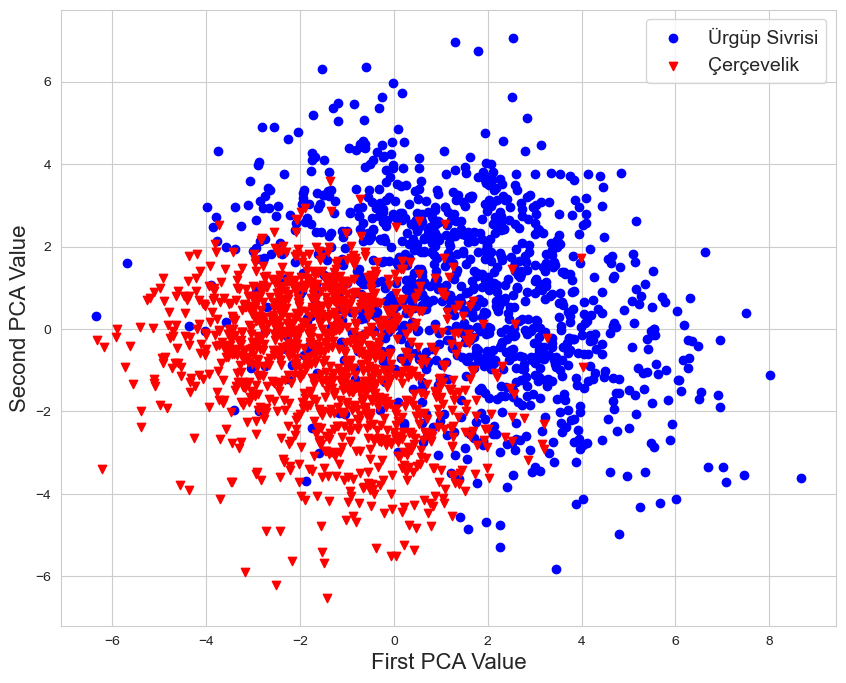

In [23]:
## Fill in the missing code for the scatter plot here
plt.figure(figsize=(10,8))

## plot one seed type with this
mask = (seeds_train.y == 1).values
plt.scatter(fit[mask,0],
            fit[mask,1],
            color='b',
            label='Ürgüp Sivrisi')

## plot the other seed type here

mask = (seeds_train.y == 0).values
plt.scatter(fit[mask,0],
            fit[mask,1],
            color='r',
            marker='v',
            label='Çerçevelik')

plt.legend(fontsize=14)

plt.xlabel("First PCA Value", fontsize=16)
plt.ylabel("Second PCA Value", fontsize=16)

plt.show()

##### b.

How does the PCA with only two componenets appear to separate the data?

##### Write your thoughts here

##### c.

Run 10-fold cross-validation below to find the optimal value of $k$ for a $k$ nearest neighbors model fit on the first and second PCA values. What is the optimal $k$ and the associated average cross-validation accuracy? How does this compare to the accuracies from `Fall Problem Session 7`?

In [24]:
## Importing what you'll use in this problem 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [42]:
## make the kfold object here
n_splits=10
kfold = StratifiedKFold(n_splits,
                       shuffle=True,
                       random_state = 100)

In [43]:
## your potential range of k values
ks = range(1, 51)

## this will hold the accuracy scores
pca_2_accs = np.zeros((n_splits, len(ks)))

i = 0
## fill in the missing pieces below
## looping through the training and holdout splits of CV
for train_index, test_index in kfold.split(seeds_train,seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    ## looping throught he different numbers of neigbors
    for k in ks:
        ## make your PCA knn pipeline here
        pipe = pca = Pipeline([('scale', StandardScaler()),
               ('pca', PCA(2)),('knn',KNeighborsClassifier(k))])

        ## fit the pipeline
        pipe.fit(seeds_tt[features].values,seeds_tt.y.values)
        
        ## get your prediction on the holdout set
        pred = pipe.predict(seeds_ho[features].values)
        
        
        ## recording the accuracy score on the holdout set
        pca_2_accs[i,j] = accuracy_score(seeds_ho.y.values, pred)
        
        j = j + 1
    i = i + 1

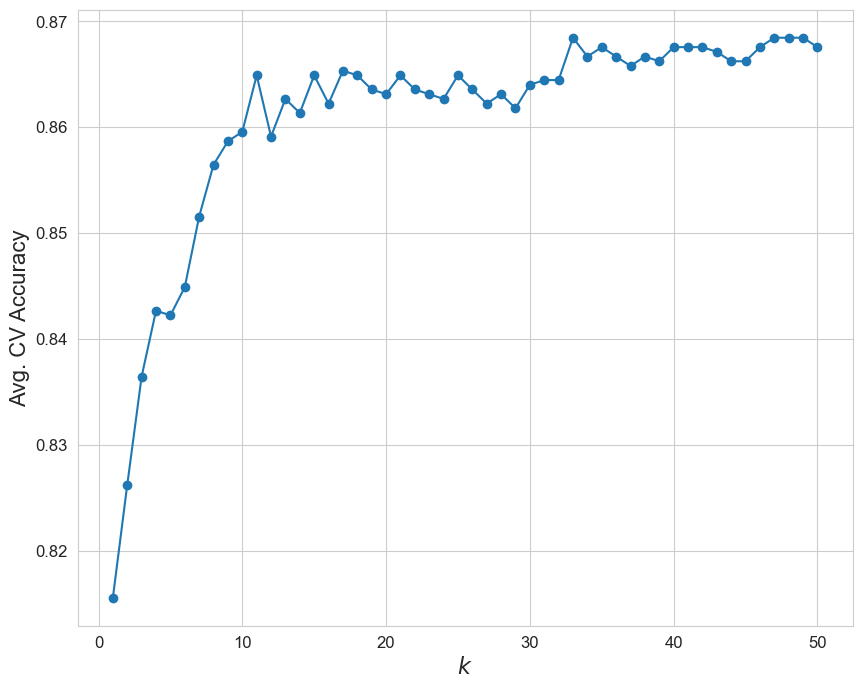

In [44]:
## This will plot the average CV accuracy for you
plt.figure(figsize=(10,8))


plt.plot(ks, 
         np.mean(pca_2_accs, axis=0),
         '-o')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Avg. CV Accuracy", fontsize=16)

plt.show()

##### Write any notes here

##### d.

We discussed examining the explained variance ratio as a way to determine how many components we may want to use in our PCA. We can also think of the explained variance as another hyperparameter we can tune through cross-validation.

Fill in the missing code below to find the optimal explained variance ratio and $k$ pairing for this problem. What is the best average cross-validation accuracy? How many components did you end up needing to achieve the highest average cross-validation accuracy?

In [49]:
## possible k values
ks = range(1, 51)

## possible explained variance values
explained_variances = np.arange(.09, 1, .1)

## this holds the cv accuracies
pca_accs = np.zeros((n_splits, len(ks), len(explained_variances)))

i = 0
## looping through the train and holdout splits
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    ## the training data
    seeds_tt = seeds_train.iloc[train_index]
    ## the holdout data
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    ## loop through the neighbor possibilities for knn
    ## note the use of neighbors instead of k
    for neighbors in ks:
        k = 0
        
        ## loop through the different explained variance values
        for var in explained_variances:
            ## make the pipeline
            pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(var)),('knn',KNeighborsClassifier(neighbors))])

            ## fit the pipeline
            pipe.fit(seeds_tt[features].values,seeds_tt.y.values)

            ## make the prediction on the holdout set
            pred = pipe.predict(seeds_ho[features].values)

            ## record the accuracy
            pca_accs[i,j,k] = accuracy_score(seeds_ho.y.values, pred)
            k = k + 1
        j = j + 1
    i = i + 1

In [50]:
## This code will tell you the optimal variance-k pairing
max_index = np.unravel_index(np.argmax(np.mean(pca_accs, axis=0), axis=None), 
                                       np.mean(pca_accs, axis=0).shape)


print("The pair with the highest AVG CV Accuracy was",
         "k =", ks[max_index[0]],
         "and explained variance =", np.round(explained_variances[max_index[1]],2))
print("The highest AVG CV Accuracy was", np.max(np.mean(pca_accs, axis=0)))

The pair with the highest AVG CV Accuracy was k = 27 and explained variance = 0.89
The highest AVG CV Accuracy was 0.8857777777777777


In [60]:
## find the number of components here
pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(0.89))])

## fit the pipeline
pipe.fit_transform(seeds_train[features].values,seeds_train.y.values).shape


(2250, 3)

In [61]:
pipe.components_

AttributeError: 'Pipeline' object has no attribute 'components_'

#### 4. Trying Bayes based classifiers

Build LDA, QDA and naive Bayes' models on these data by filling in the missing code for the cross-validation below. 

Do these outperform your PCA-$k$NN model from above?

<i>Note: it is good practice to scale your data prior to fitting LDA, QDA or Naive Bayes</i>.

In [62]:
## import what you need here

## import LDA and QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
## import GaussianNB
from sklearn.naive_bayes import GaussianNB

In [63]:
## This will hold the accuracies
bayes_accs = np.zeros((n_splits, 3))


i = 0
## looping through the train and holdout splits of CV
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    #### Don't forget to scale the data first ####
    
    
    
    ## Linear Discriminant Analysis
    lda = Pipeline([('scale', StandardScaler()),
               ('lda', LinearDiscriminantAnalysis())])
    
    lda.fit(seeds_tt[features].values,
               seeds_tt.y.values)
    lda_pred = lda.predict(seeds_ho[features].values)
    
    bayes_accs[i, 0] = accuracy_score(seeds_ho.y.values,
                                         lda_pred)
    
    ## Quadratic Discriminant Analysis
    qda = Pipeline([('scale', StandardScaler()),
               ('qda', QuadraticDiscriminantAnalysis())])
    
    
    qda.fit(seeds_tt[features].values,
               seeds_tt.y.values)
    
    qda_pred = qda.predict(seeds_ho[features].values)
    
    bayes_accs[i, 1] = accuracy_score(seeds_ho.y.values,
                                         qda_pred)
    
    
    ## Gaussian Naive Bayes
    nb = Pipeline([('scale', StandardScaler()),
               ('GNB', GaussianNB())])
    
    nb.fit(seeds_tt[features].values,
              seeds_tt.y.values)
    
    nb_pred = nb.predict(seeds_ho[features].values)
    
    bayes_accs[i, 2] = accuracy_score(seeds_ho.y.values,
                                         nb_pred)
    
    i = i + 1

In [64]:
## getting the average cv accuracies for these models
np.mean(bayes_accs, axis=0)

array([0.87911111, 0.88133333, 0.86755556])

##### Make any notes you'd like here

#### 5. LDA for supervised dimensionality reduction

While we introduced linear discriminant analysis (LDA) as a classification algorithm, it was originally proposed by Fisher as a supervised dimension reduction technique, <a href="https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf">https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf</a>. In particular, the initial goal was to project the features, $X$, corresponding to a binary output, $y$, onto a single dimension which best separates the possible classes. This single dimension has come to been known as <i>Fisher's discriminant</i>.

Walk through the code below to perform this supervised dimension reduction technique on these data

##### a.

First make a validation set from the training set for demonstration purposes.

In [67]:
## First we make a validation set for demonstration purposes
seed_tt, seeds_val = train_test_split(seeds_train,
                                     shuffle=True,
                                     random_state = 100,
                                     test_size = 0.1,
                                     stratify=seeds_train.y.values)

##### b.

Now make a pipeline that first scales the data and ends with linear discriminant analysis. Then fit the pipeline.

In [68]:
pipe = Pipeline([('scale', StandardScaler()),
               ('lda', LinearDiscriminantAnalysis())])

In [69]:
pipe.fit(seeds_tt[features].values,seeds_tt.y.values)

Pipeline(steps=[('scale', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

##### c. 

Now calculate the Fisher discriminant by using `transform` with the pipeline you fit in <i>b.</i>

In [71]:
pipe_trans = pipe.transform(seeds_tt[features].values)

##### d. 

To visualize how LDA separated the two classes while projecting the 12 dimensional data onto a one dimensional subspace you can plot a histogram of the Fisher discriminant colored by the pumpkin seed class of the observation.

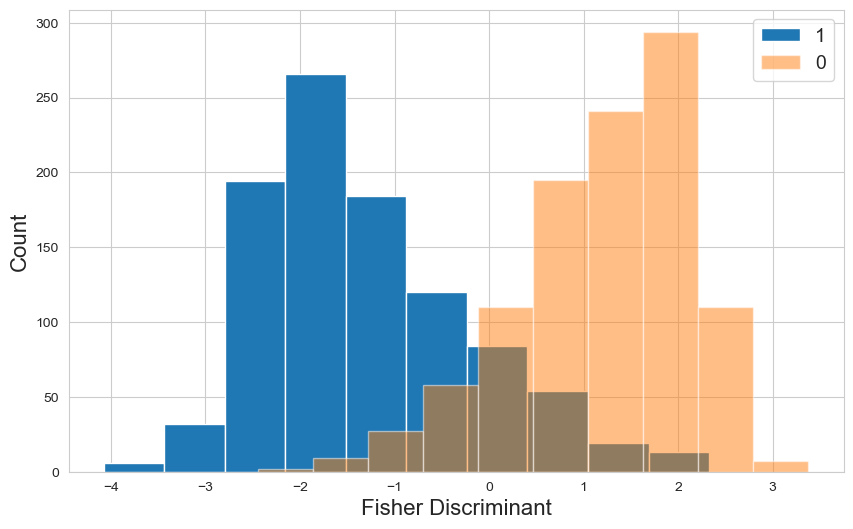

In [74]:
plt.figure(figsize=(10,6))

## plot the histogram of discriminant values (what you got from part c)
## for one seed type here, make sure to include a label
plt.hist(pipe_trans[(seeds_tt.y == 1).values],label='1')

## plot the histogram of discriminant values
## for the other seed type here, make sure to include a label
plt.hist(pipe_trans[(seeds_tt.y == 0).values],label='0',alpha=0.5)

plt.xlabel("Fisher Discriminant", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(fontsize=14)


plt.show()

##### e.

While there is some separation between the two classes, it is not perfect, this should be expected based on the exploratory data analysis you did in `Fall Problem Session 7`.

We could use this discriminant in order to make classifications, for example by setting a simple cutoff value or as input into a different classification algorithm.

However, it is important to note that the LDA algorithm maximizes the separation of the two classes among observations of the training set. It is possible that separation would not be as good for data the algorithm was not trained on.

In this example we can visually inspect by plotting a histogram of the Fisher discriminant values for the validation set we created. Does the separation seem as pronounced on the validation data? Investigate this by examining the histograms for the Fisher discriminants of the validation set.

<i>Note: remember that when getting the discriminants on the validation set you should not refit the LDA model, just use `transform`.</i>

In [75]:
pipe_trans_val = pipe.transform(seeds_val[features].values)

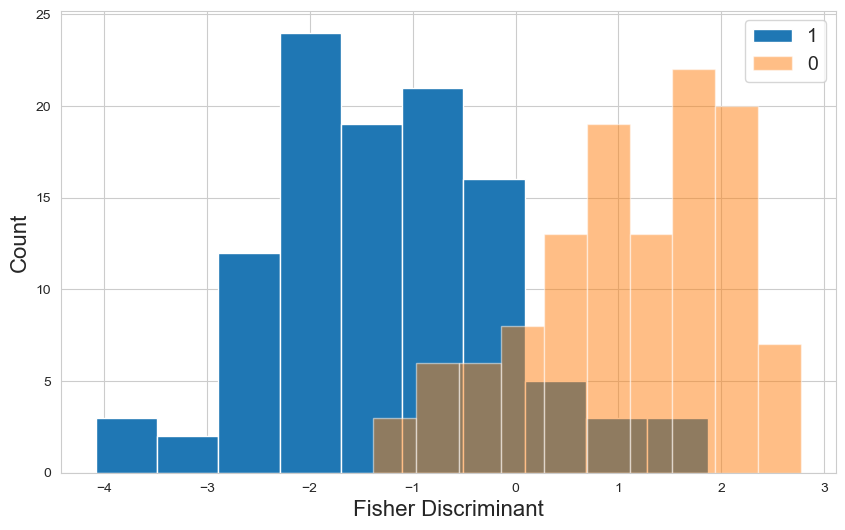

In [76]:
plt.figure(figsize=(10,6))

## plot the histogram of discriminant values (what you got from part c)
## for one seed type here, make sure to include a label
plt.hist(pipe_trans_val[(seeds_val.y == 1).values],label='1')

## plot the histogram of discriminant values
## for the other seed type here, make sure to include a label
plt.hist(pipe_trans_val[(seeds_val.y == 0).values],label='0',alpha=0.5)

plt.xlabel("Fisher Discriminant", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(fontsize=14)


plt.show()

##### Make any notes you'd like here

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)